## Import Package

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Bimbing/Zenius - Kampus Merdeka/Day 13 - Statistical Modeling I (Supervised Learning - Regression)/Advertising.csv')
data.head()

FileNotFoundError: ignored

In [ ]:
data = data[['TV','Sales']]
data.head(3)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3


## Simple Linear Regression

Text(0, 0.5, 'Sales')

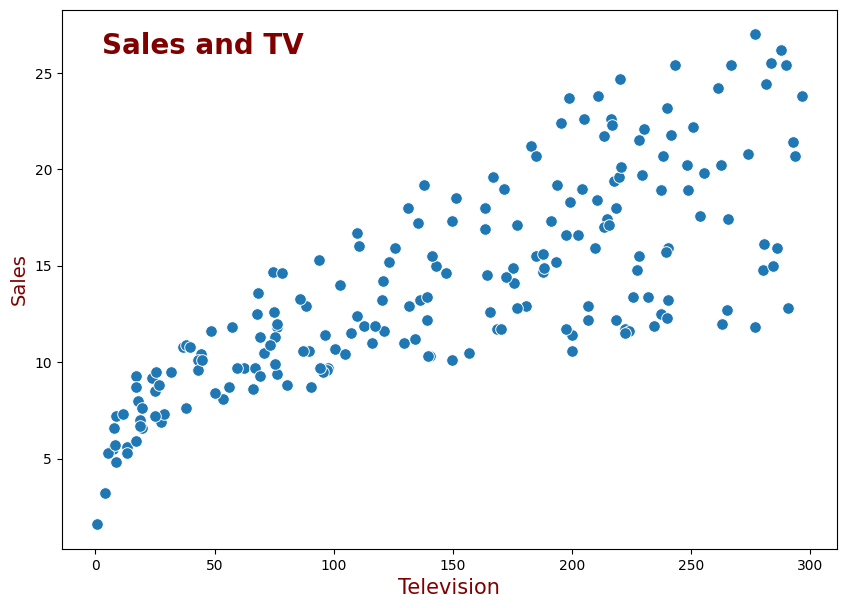

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(x='TV', y='Sales', data=data, s=70)

title = 'Sales and TV'
ax.text(45,26,title,horizontalalignment='center',color='#800000',fontsize=20,fontweight='bold')

ax.set_xlabel('Television', fontsize=15, color='#800000')
ax.set_ylabel('Sales', fontsize=14, color='#800000')


In [ ]:
data.columns = ['x','y']
data.head()

,x,y
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


## Simple Linear Regression From Scratch

In [ ]:
data['(x-x_mean)'] = round(data['x'] - data['x'].mean(),2)
data['(y-y_mean)'] = round(data['y'] - data['y'].mean(),2)
data['(x-x_mean)(y-y_mean)'] = data['(x-x_mean)'] *data['(y-y_mean)']
data['pow((x-x_mean),2)'] = round(pow(data['x'] - data['x'].mean(),2),2)

In [ ]:
data.head()

,x,y,(x-x_mean),(y-y_mean),(x-x_mean)(y-y_mean),"pow((x-x_mean),2)",y_pred
0,230.1,22.1,83.06,8.08,671.1248,6898.55,17.970775
1,44.5,10.4,-102.54,-3.62,371.1948,10514.96,9.147974
2,17.2,9.3,-129.84,-4.72,612.8448,16859.07,7.850223
3,151.5,18.5,4.46,4.48,19.9808,19.87,14.234395
4,180.8,12.9,33.76,-1.12,-37.8112,1139.57,15.627218


In [ ]:
b1 = data['(x-x_mean)(y-y_mean)'].sum() / data['pow((x-x_mean),2)'].sum()
b1

0.047536644161412324

In [ ]:
data['y'].mean(), data['x'].mean()

(14.0225, 147.0425)

In [ ]:
b0 = data['y'].mean() - b1 * data['x'].mean()
b0

7.032593000895529

In [ ]:
textstr = 'y = '+str(b0)+' + '+str(b1)+' * x'
textstr

'y = 7.032593000895529 + 0.047536644161412324 * x'

In [ ]:
data['y_pred'] = b0 + b1*data['x']
data.head(5)

,x,y,(x-x_mean),(y-y_mean),(x-x_mean)(y-y_mean),"pow((x-x_mean),2)",y_pred
0,230.1,22.1,83.06,8.08,671.1248,6898.55,17.970775
1,44.5,10.4,-102.54,-3.62,371.1948,10514.96,9.147974
2,17.2,9.3,-129.84,-4.72,612.8448,16859.07,7.850223
3,151.5,18.5,4.46,4.48,19.9808,19.87,14.234395
4,180.8,12.9,33.76,-1.12,-37.8112,1139.57,15.627218


## Simple Linear Regression with sklearn

In [ ]:
x = data.x.values.reshape(-1,1)
y = data.y.values.reshape(-1,1)

model = LinearRegression().fit(x, y)

b0 = float(model.intercept_[0])
b0 = round(b0,3)
b1 = float(model.coef_[0][0])
b1 = round(b1,3)
print('intercept (b0 ): ', b0)
print('slope (b1) : ', b1)
print(' ')
textstr = 'y = '+str(b0)+' + '+str(b1)+' * x'
print(textstr)

intercept (b0 ):  7.033
slope (b1) :  0.048
 
y = 7.033 + 0.048 * x


Text(0, 0.5, 'Sales')

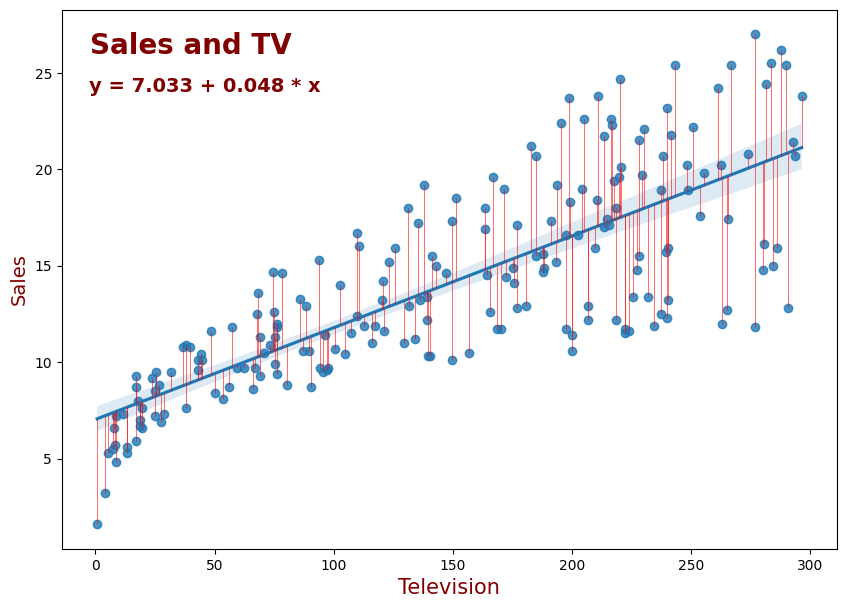

In [ ]:
fit = np.polyfit(data['x'], data['y'], deg=1)
y_hat = fit[1] + data['x'] * fit[0]

fig, ax = plt.subplots(figsize=(10,7))
sns.regplot(x='x', y='y', data=data)
plt.vlines(data['x'], y_hat, data['y'], lw = .4, colors='r');

title = 'Sales and TV'
ax.text(40,26,title,horizontalalignment='center',color='#800000',fontsize=20,fontweight='bold')
ax.text(46,24,textstr,horizontalalignment='center',color='#800000',fontsize=14,fontweight='bold')
ax.set_xlabel('Television', fontsize=15, color='#800000')
ax.set_ylabel('Sales', fontsize=14, color='#800000')


## Multiple Linear Regression

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Bimbing/Zenius - Kampus Merdeka/Day 13 - Statistical Modeling I (Supervised Learning - Regression)/Advertising.csv')
data = data[['TV','Radio','Sales']]
data.head()

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9


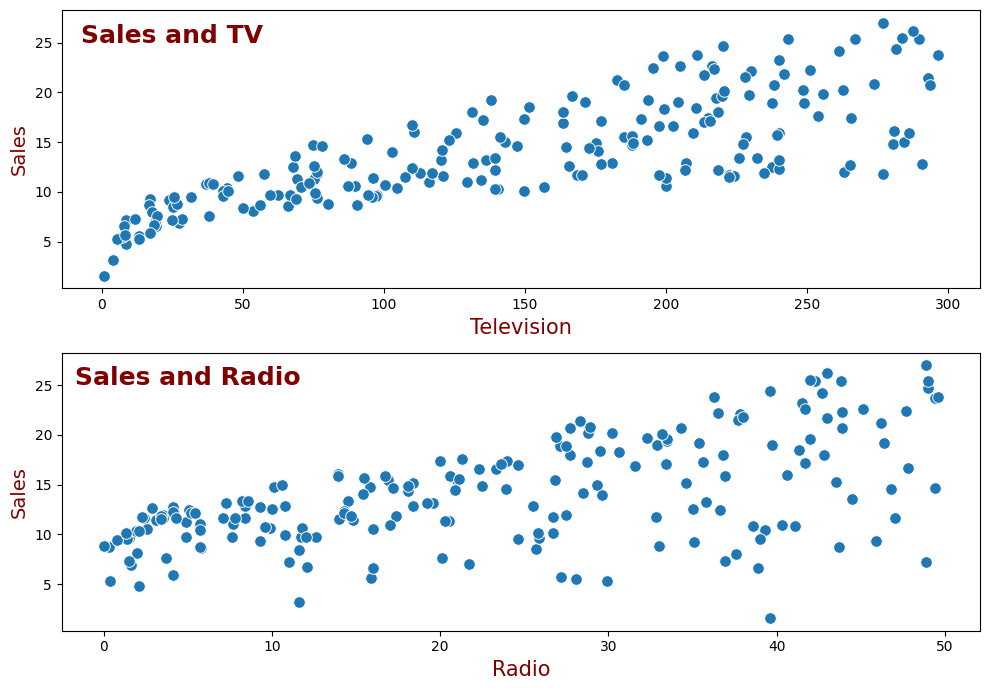

In [ ]:
fig, (ax1, ax2 )= plt.subplots(2,1,figsize=(10,7))
sns.scatterplot(x='TV', y='Sales', data=data, s=70, ax=ax1)

title = 'Sales and TV'
ax1.text(25,25,title,horizontalalignment='center',color='#800000',fontsize=18,fontweight='bold')

ax1.set_xlabel('Television', fontsize=15, color='#800000')
ax1.set_ylabel('Sales', fontsize=14, color='#800000')

sns.scatterplot(x='Radio', y='Sales', data=data, s=70, ax=ax2)

title = 'Sales and Radio'
ax2.text(5,25,title,horizontalalignment='center',color='#800000',fontsize=18,fontweight='bold')

ax2.set_xlabel('Radio', fontsize=15, color='#800000')
ax2.set_ylabel('Sales', fontsize=14, color='#800000')
               
plt.tight_layout()

In [ ]:
data = data[['TV','Radio','Sales']]
data.columns = ['x1','x2','y']
data.head()

,x1,x2,y
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9


In [ ]:
x = data[['x1','x2']]
y = data['y']

model = LinearRegression().fit(x, y)

In [ ]:
b0 = round(float(model.intercept_),3)
b1 = round(float(model.coef_[0]),3)
b2 = round(float(model.coef_[1]),3)
print('intercept (b0 ) : ', b0)
print('slope (b1)      : ', b1)
print('slope (b2)      : ', b2)
print(' ')
textstr = 'y = '+str(b0)+' + '+str(b1)+' * x1  + '+str(b2)+' * x2'
print(textstr)

intercept (b0 ) :  2.921
slope (b1)      :  0.046
slope (b2)      :  0.188
 
y = 2.921 + 0.046 * x1  + 0.188 * x2
